In [69]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [70]:
# Load data 
test_data = pd.read_csv("test.csv")
train_data = pd.read_csv("train.csv")
train_data_size = len(train_data)
print(f'Number of samples = {train_data_size}')
print('Columns:', [col for col in train_data])
train_data.head()

Number of samples = 891
Columns: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


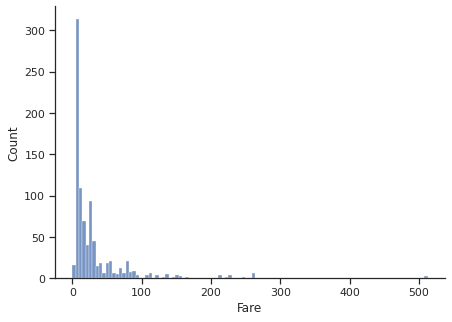

In [73]:
# check missing values - age has missing
# check null/nan values
# is it possible to group families?
# what does master, miss, mr, mrs mean?
# do we need to worry whether data is consistent or reliable? For example, does Fare correlate with Pclass?

sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)
sns.histplot(
    train_data['Fare'])
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
# ax.set_xticks([500, 1000, 2000, 5000, 10000])

In [65]:
# Baseline classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

y = train_data["Survived"]
features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])

skf = StratifiedKFold(n_splits=10)
acc_train = []
acc_test  = []
for train_index, test_index in skf.split(X, y):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
    model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=1)
    model.fit(X_train, y_train)
    # print('train -  {}   |   test -  {}'.format(np.bincount(y_train), np.bincount(y_test)))
    print(f' Train: {model.score(X_train, y_train):.2f} Test: {model.score(X_test, y_test):.2f}')
    acc_train.append(model.score(X_train, y_train))
    acc_test.append(model.score(X_test, y_test))
    # break

print(f'Avg train accuracy: {np.mean(acc_train):.2f} {np.std(acc_train):.3f}')
print(f'Avg test  accuracy: {np.mean(acc_test):.2f} {np.std(acc_train):.3f}')
# model.fit(X, y)
# print(f'Baseline Accuracy: {model.score(X, y):.2f}')

 Train: 0.81 Test: 0.81
 Train: 0.81 Test: 0.81
 Train: 0.81 Test: 0.78
 Train: 0.81 Test: 0.84
 Train: 0.81 Test: 0.83
 Train: 0.81 Test: 0.79
 Train: 0.81 Test: 0.80
 Train: 0.81 Test: 0.79
 Train: 0.81 Test: 0.82
 Train: 0.81 Test: 0.80
Avg train accuracy: 0.81 0.003
Avg test  accuracy: 0.81 0.003


In [ ]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")
